In [77]:
import os
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy.stats import zscore
import geopandas as gpd

In [78]:
# Update Path
path = "***"
os.chdir(path)
os.getcwd()

'/Users/herbieborek/Dropbox/H-Masters/Datasets'

In [79]:
# Import dataset
df = pd.read_csv("alcohol-consumption-vs-gdp-per-capita.csv")
df.head()

,Entity,Code,Year,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2010,0.21,1957.029070,29185511.0,NaN
2,Afghanistan,AFG,2015,0.21,2068.265904,34413603.0,Asia
3,Afghanistan,AFG,2018,0.21,2033.804389,37171922.0,NaN
4,Afghanistan,AFG,2002,NaN,1189.784668,22600774.0,NaN


In [80]:
#    Some of the column names are a bit long, so I'm going to change them
# to give us the necessary amount of information

df.rename(columns={'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)':'Alcohol Consumption','GDP per capita, PPP (constant 2017 international $)':'GDP Per Capita','Population (historical estimates)':'Population'},
         inplace=True,
         )

df.head()

,Entity,Code,Year,Alcohol Consumption,GDP Per Capita,Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2010,0.21,1957.029070,29185511.0,NaN
2,Afghanistan,AFG,2015,0.21,2068.265904,34413603.0,Asia
3,Afghanistan,AFG,2018,0.21,2033.804389,37171922.0,NaN
4,Afghanistan,AFG,2002,NaN,1189.784668,22600774.0,NaN


In [81]:
# Drop the missing data
df = df.dropna()
df.head()

,Entity,Code,Year,Alcohol Consumption,GDP Per Capita,Population,Continent
2,Afghanistan,AFG,2015,0.21,2068.265904,34413603.0,Asia
585,Albania,ALB,2015,6.74,11878.488093,2890524.0,Europe
844,Algeria,DZA,2015,0.93,11696.965229,39728020.0,Africa
1476,Angola,AGO,2015,7.96,8036.410898,27884380.0,Africa
1857,Antigua and Barbuda,ATG,2015,5.89,18594.261624,93571.0,North America


In [82]:
# Average alcohol consumption by country

country_average = df.groupby(['Entity'])['Alcohol Consumption'].mean().sort_values(ascending=False).reset_index(name='Average Consumption')
country_average

,Entity,Average Consumption
0,Seychelles,18.350
1,Lithuania,15.380
2,Uganda,15.140
3,Czechia,14.250
4,Luxembourg,13.180
...,...,...
175,Mauritania,0.033
176,Libya,0.029
177,Bangladesh,0.021
178,Somalia,0.013


In [83]:
# The top five countries by average consumption

top_average = country_average.head()
top_average

,Entity,Average Consumption
0,Seychelles,18.35
1,Lithuania,15.38
2,Uganda,15.14
3,Czechia,14.25
4,Luxembourg,13.18


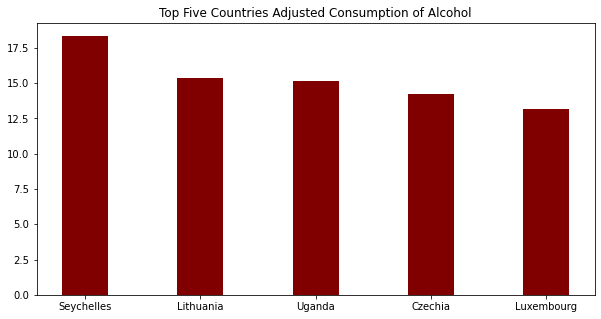

In [84]:
fig = plt.figure(figsize = (10, 5))
plt.bar(top_average['Entity'], top_average['Average Consumption'], color ='maroon', width = 0.4)
plt.title("Top Five Countries Adjusted Consumption of Alcohol")
plt.show()

In [85]:
# Bottom five countries in average consumption

bottom_average = country_average[-5:]
bottom_average

,Entity,Average Consumption
175,Mauritania,0.033
176,Libya,0.029
177,Bangladesh,0.021
178,Somalia,0.013
179,Kuwait,0.003


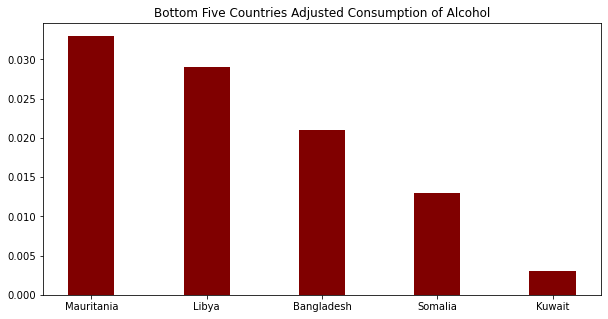

In [86]:
fig = plt.figure(figsize = (10, 5))
plt.bar(bottom_average['Entity'], bottom_average['Average Consumption'], color ='maroon', width = 0.4)
plt.title("Bottom Five Countries Adjusted Consumption of Alcohol")
plt.show()

In [87]:
# Average consumption by continent

continent_average = df.groupby(['Continent'])['Alcohol Consumption'].mean().sort_values(ascending=False).reset_index(name='Average Consumption')
continent_average

,Continent,Average Consumption
0,Europe,10.875750
1,South America,6.919091
2,North America,6.605455
3,Africa,4.782019
4,Asia,3.747302
5,Oceania,3.466667


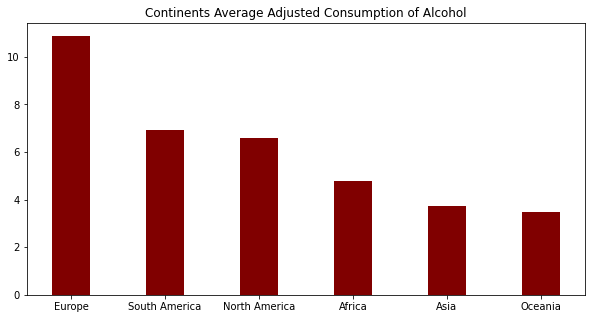

In [88]:
fig = plt.figure(figsize = (10, 5))
plt.bar(continent_average['Continent'], continent_average['Average Consumption'], color ='maroon', width = 0.4)
plt.title("Continents Average Adjusted Consumption of Alcohol")
plt.show()

In [89]:
continent_GDP = df.groupby(['Continent'])['GDP Per Capita'].mean().sort_values(ascending=False).reset_index(name='GDP Per Capita')
continent_GDP

,Continent,GDP Per Capita
0,Europe,36747.393491
1,Asia,21898.297092
2,North America,18736.726988
3,South America,15850.738070
4,Oceania,12136.344981
5,Africa,5767.072745


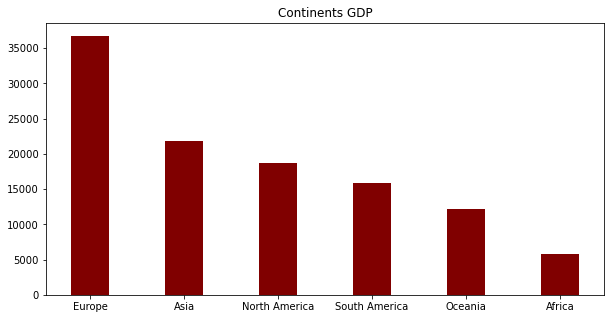

In [90]:
fig = plt.figure(figsize = (10, 5))
plt.bar(continent_GDP['Continent'], continent_GDP['GDP Per Capita'], color ='maroon', width = 0.4)
plt.title("Continents GDP")
plt.show()

In [91]:
europe = df[df['Continent'] == 'Europe']
europe.head()

,Entity,Code,Year,Alcohol Consumption,GDP Per Capita,Population,Continent
585,Albania,ALB,2015,6.74,11878.488093,2890524.0,Europe
3289,Austria,AUT,2015,12.07,52798.099461,8678667.0,Europe
4837,Belarus,BLR,2015,12.00,18307.519668,9439424.0,Europe
5096,Belgium,BEL,2015,11.82,49455.441337,11287931.0,Europe
6535,Bosnia and Herzegovina,BIH,2015,6.92,12630.662343,3429362.0,Europe


In [92]:
country_average_europe = europe.groupby(['Entity'])['Alcohol Consumption'].mean().sort_values(ascending=False).reset_index(name='Average Consumption')
country_average_europe.head()

,Entity,Average Consumption
0,Lithuania,15.38
1,Czechia,14.25
2,Luxembourg,13.18
3,Germany,13.06
4,Slovenia,12.74


In [93]:
country_GDP_europe = europe.groupby(['Entity'])['GDP Per Capita'].mean().sort_values(ascending=False).reset_index(name='GDP Per Capita')
country_GDP_europe.head()

,Entity,GDP Per Capita
0,Luxembourg,110446.086102
1,Ireland,72251.153536
2,Switzerland,68025.920038
3,Norway,62987.535863
4,Netherlands,52974.116220


In [94]:
top_consumption_europe = country_average_europe[0:5]

top_GDP_europe = country_GDP_europe[0:5]

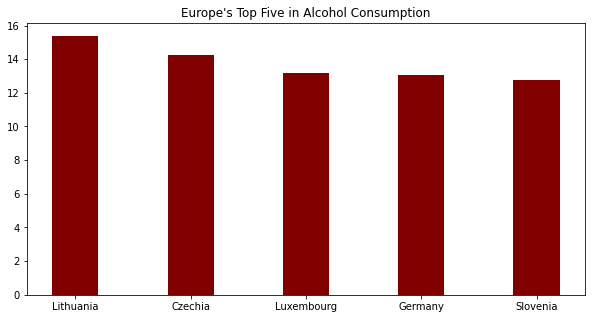

In [95]:
fig = plt.figure(figsize = (10, 5))
plt.bar(top_consumption_europe['Entity'], top_consumption_europe['Average Consumption'], color ='maroon', width = 0.4)
plt.title("Europe's Top Five in Alcohol Consumption")
plt.show()

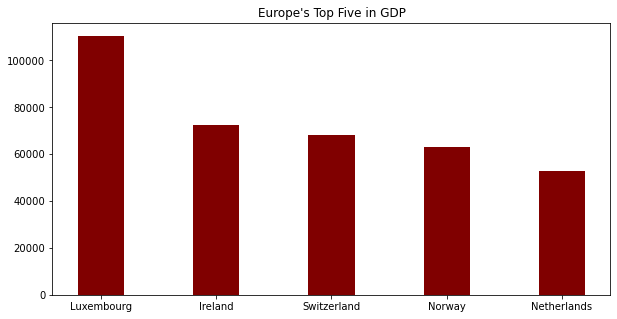

In [96]:
fig = plt.figure(figsize = (10, 5))
plt.bar(top_GDP_europe['Entity'], top_GDP_europe['GDP Per Capita'], color ='maroon', width = 0.4)
plt.title("Europe's Top Five in GDP")
plt.show()

## Correlation Analysis

In [97]:
columns_of_interest = ['Entity','Alcohol Consumption','GDP Per Capita','Population']
subset_data = df[columns_of_interest]
subset_data.head()

,Entity,Alcohol Consumption,GDP Per Capita,Population
2,Afghanistan,0.21,2068.265904,34413603.0
585,Albania,6.74,11878.488093,2890524.0
844,Algeria,0.93,11696.965229,39728020.0
1476,Angola,7.96,8036.410898,27884380.0
1857,Antigua and Barbuda,5.89,18594.261624,93571.0


In [98]:
correlation_matrix = subset_data.corr()

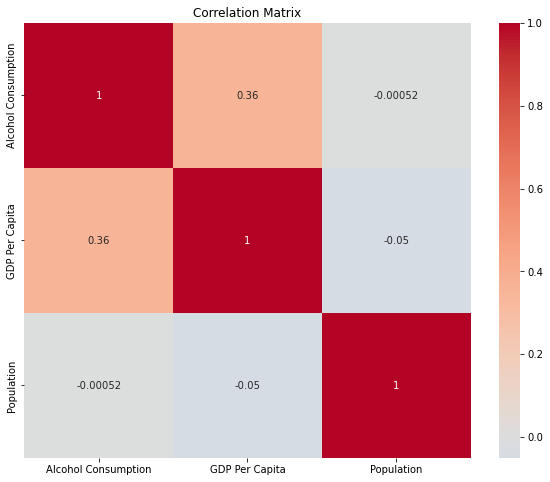

In [99]:
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

This shows that Alcohol consumption and GDP Per Capita are somewhat correlated. On average when GDP Per Capita goes up, alcohol consumption goes up. However, they are not tightly correlated, so there must be other factors.

## Regional Comparison

In [100]:
grouped_by_continent = df.groupby('Continent')
continent_comparison = grouped_by_continent[['Alcohol Consumption', 'GDP Per Capita', 'Population']].mean()

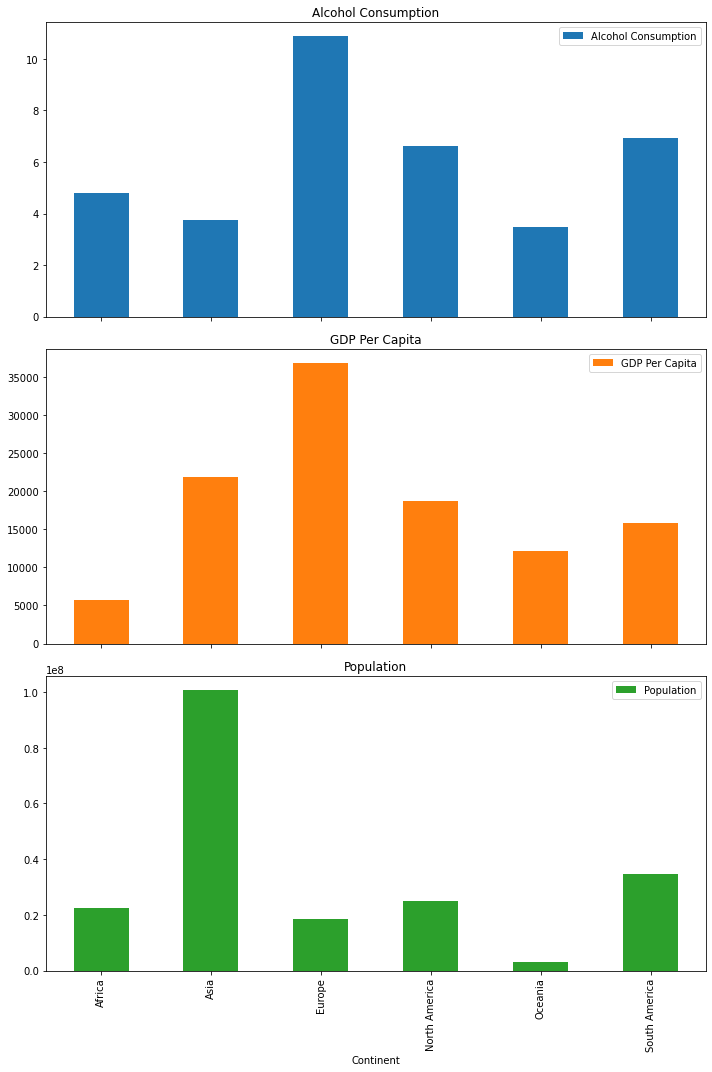

In [101]:
continent_comparison.plot(kind='bar', subplots=True, layout=(3, 1), figsize=(10, 15))
plt.tight_layout()
plt.show()

## Population vs Alcohol Consumption

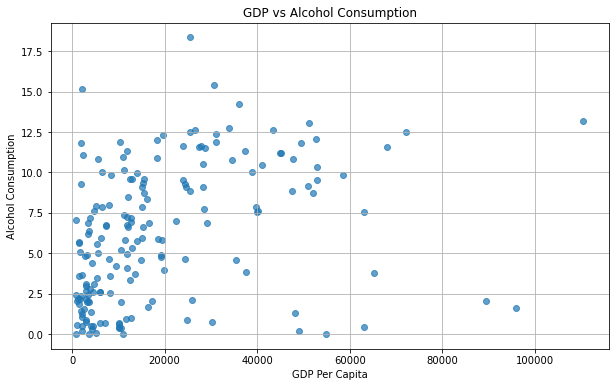

In [102]:
# Select data for scatter plot
x = df['GDP Per Capita']
y = df['Alcohol Consumption']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7)
plt.title('GDP vs Alcohol Consumption')
plt.xlabel('GDP Per Capita')
plt.ylabel('Alcohol Consumption')
plt.grid(True)
plt.show()

## Comparing GDP

In [103]:
high_gdp_threshold = df['GDP Per Capita'].quantile(0.75)
high_gdp_countries = df[df['GDP Per Capita'] >= high_gdp_threshold]
low_gdp_countries = df[df['GDP Per Capita'] < high_gdp_threshold]

In [109]:
mean_alcohol_high_gdp = high_gdp_countries['Alcohol Consumption'].mean()
mean_alcohol_low_gdp = low_gdp_countries['Alcohol Consumption'].mean()

print(f"Mean Alcohol Consumption in High GDP Countries: {mean_alcohol_high_gdp:.2f}")
print(f"Mean Alcohol Consumption in Low GDP Countries: {mean_alcohol_low_gdp:.2f}")

Mean Alcohol Consumption in High GDP Countries: 8.72
Mean Alcohol Consumption in Low GDP Countries: 5.30


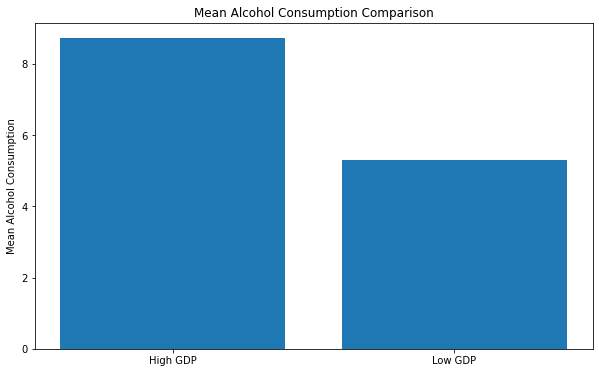

In [105]:
plt.figure(figsize=(10, 6))
plt.bar(['High GDP', 'Low GDP'], [mean_alcohol_high_gdp, mean_alcohol_low_gdp])
plt.title('Mean Alcohol Consumption Comparison')
plt.ylabel('Mean Alcohol Consumption')
plt.show()

## Outlier Detection

In [106]:
column_for_outliers = 'Alcohol Consumption'
z_scores = np.abs(zscore(df[column_for_outliers]))
z_score_threshold = 3

outlier_mask = z_scores > z_score_threshold
outlier_indices = np.where(outlier_mask)[0]
outlier_values = df.loc[outlier_indices, column_for_outliers]

Number of outliers: 0
Outlier indices: []
Outlier values: Series([], Name: Alcohol Consumption, dtype: float64)


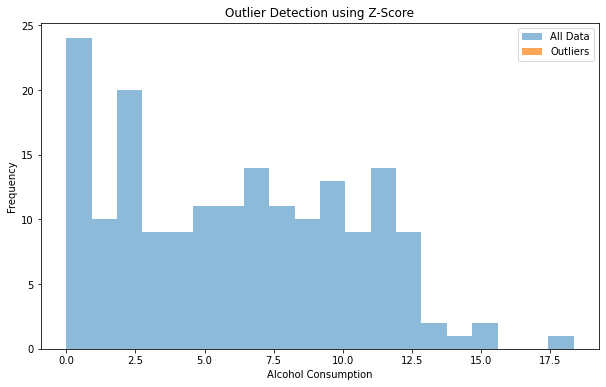

In [107]:
print("Number of outliers:", len(outlier_indices))
print("Outlier indices:", outlier_indices)
print("Outlier values:", outlier_values)


plt.figure(figsize=(10, 6))
plt.hist(df[column_for_outliers], bins=20, alpha=0.5, label='All Data')
plt.hist(outlier_values, bins=10, alpha=0.7, label='Outliers')
plt.xlabel(column_for_outliers)
plt.ylabel('Frequency')
plt.title('Outlier Detection using Z-Score')
plt.legend()
plt.show()

## Geospatial Visualizations

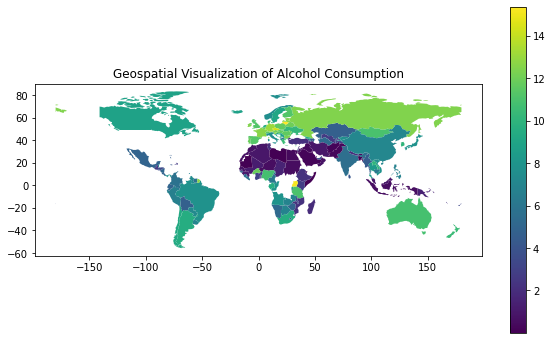

In [108]:
# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map data with your dataset based on country names
merged_data = world.merge(df, left_on='name', right_on='Entity', how='left')

# Plot the geospatial visualization
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_data.plot(column='Alcohol Consumption', ax=ax, legend=True)
plt.title('Geospatial Visualization of Alcohol Consumption')
plt.show()